# 텐서플로우를 사용한 Image Augmentation 
## (1) Flip

## 준비하기
이제 위에서 봤던 방법들을 코드로 사용해 보겠습니다. 필요에 따라서 매개변수에 전달하는 값을 바꿔보고 데이터에 랜덤하게 적용해 보도록 하겠습니다. 이미지를 PIL로 로드하고 이를 텐서로 바꾼 뒤, 기법을 하나씩 적용해보고 이를 다시 이미지로 화면에 표시해서 결과를 확인하겠습니다.


In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel0042/aiffel/data_augmentation/images/mycat.jpg'

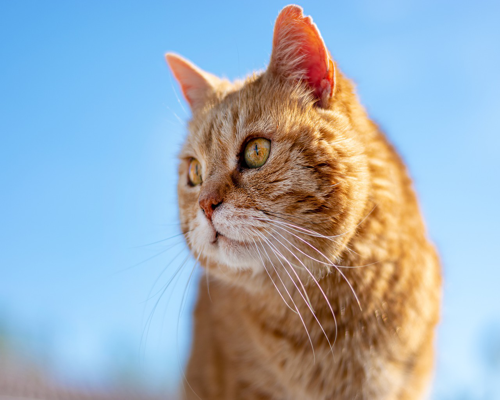

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

# Flip 해보기
Flip을 적용해줍시다. Flip은 flip_left_right와 flip_up_down 두 가지로 좌우와 상하 반전으로 구분됩니다.

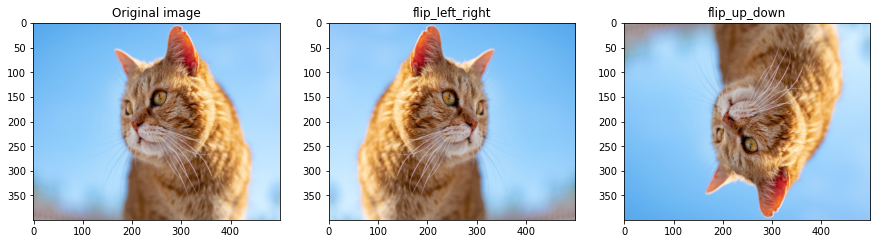

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

위의 함수들은 일괄적으로 상하 또는 좌우 반전을 적용합니다. 우리는 이를 확률에 따라서 적용되도록 해야합니다. 그래야 반전이 되지 않은 원본 데이터도 활용이 될 수 있기 때문이죠. 이를 위해서 활용할 수 있는 것이 random_flip_left_right와 random_flip_up_down입니다. 필요에 따라서는 직접 이 둘을 합쳐서 random_flip으로 상하좌우 반전을 적용하는 함수를 직접 만들어 볼 수 있겠네요. 아래 코드를 반복해서 돌려보면서 random augmentation이 어떻게 작동하는지 직접 확인해 봅시다!



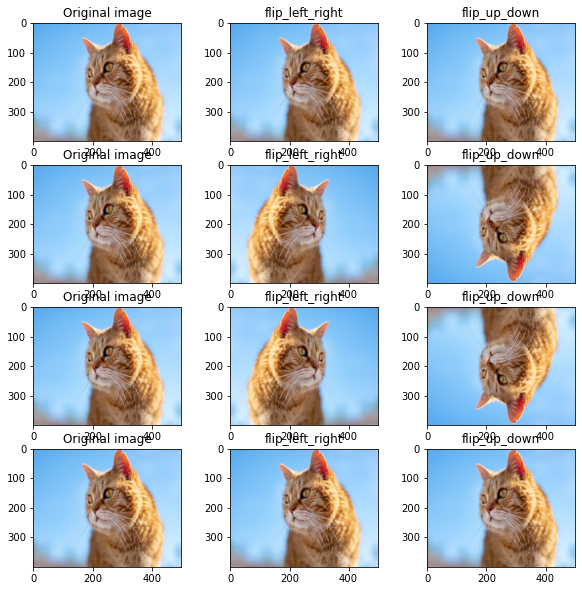

In [4]:
plt.figure(figsize=(10, 10))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

# 텐서플로우를 사용한 Image Augmentation 
## (2) Center Crop
Center crop은 이전에 설명드렸던 것과 같이 중앙을 기준으로 자른 이미지를 사용하는 augmentation 기법입니다.

단순하게 중심점을 기준으로 사진을 확대하는 것으로 생각하기 쉽지만, 적용할 때 주의해 사용해야 합니다. central_fraction은 얼마나 확대를 할지를 조절하는 매개변수입니다. 1.0인 경우는 원본 이미지와 같습니다. 그러나 예를 들어 고양이 이미지를 확대하면 0.5까지는 보일 수 있지만 0.25 수준으로 내려가면 털만 보이고 고양이의 형상을 찾기 어려울 수 있습니다. 따라서 central_fraction의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야합니다.

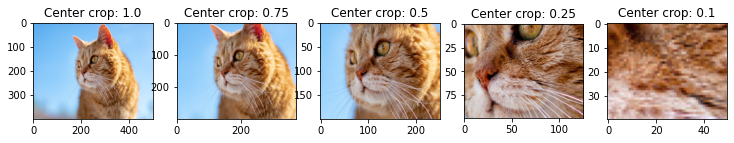

In [5]:
plt.figure(figsize=(15, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

랜덤하게 centeral_crop을 적용하는 함수는 텐서플로우에서 기본적으로 제공되지 않습니다. 그렇다면 어떻게 만들 수 있을까요? 파이썬의 random 모듈을 사용하셔도 되고 텐서플로우의 랜덤 모듈을 사용하셔도 됩니다.

아래는 tf.random.uniform을 사용해서 central_fraction 매개변수에 전달할 값을 만들고 이를 사용해 cropped_tensor를 만들어내는 random_central_crop() 함수입니다.



In [6]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

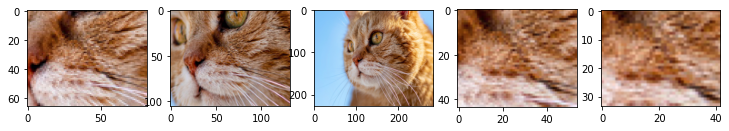

In [7]:
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

텐서플로우의 tf.random 모듈에는 무작위성을 지닌 데이터를 얻을 수 있는 함수가 여러 가지 있습니다. 그 중 tf.random.uniform()과 tf.random.normal()의 차이: 랜덤값을 uniform distribution으로 뽑는 것과 normal distribution으로 뽑는 차이 입니다. normal distribution의 경우 mean, std를 통해서 분포를 조절할 수 있습니다.

# 텐서플로우를 사용한 Image Augmentation 
## (3) 직접 해보기

이제 직접 augmentation을 활용해 보는 시간을 갖겠습니다. 직접 사용할 함수는 tf.image.random_crop()와 tf.image.random_brightness()입니다.

## tf.image.random_crop()

위의 공식 문서를 확인하고 고양이 사진에 random_crop()을 적용해 보세요!

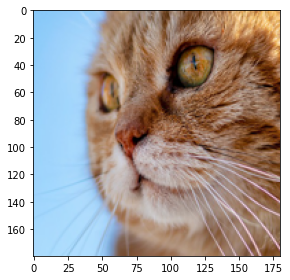

In [9]:
# apply random_crop on cat image
plt.figure(figsize=(15, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.subplot(1,3,1)
plt.imshow(random_crop_image)

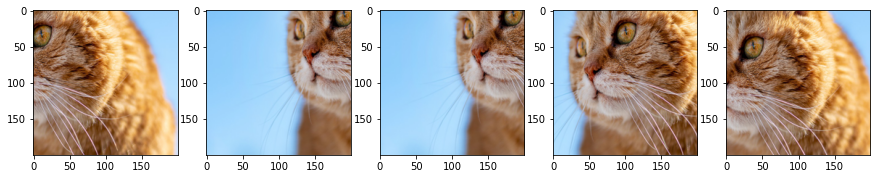

In [10]:
# display 5 random cropped images
plt.figure(figsize=(15, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

## tf.image.random_brightness()
두 번째로 적용할 함수는 tf.image.random_brightness()입니다. 공식 문서를 확인하면서 이미지에 적용해 봅시다.

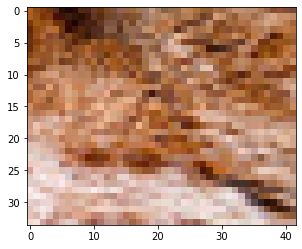

In [11]:
# apply random_brightness on cat image

cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
plt.imshow(cropped_img)

적용한 샘플을 5장 만들어서 직접 화면에 띄워 봅시다.

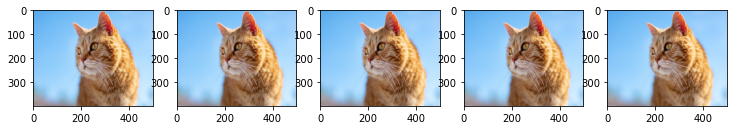

In [12]:
# display 5 random brightness images

plt.figure(figsize=(15, 15))

col = 5
for i in range(5):
    cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

# imgaug 라이브러리
## imgaug 라이브러리 사용하기

지금까지 텐서플로우에서 기본적으로 제공되는 augmentation 함수들을 확인해봤습니다. 이러한 augmentation만을 모아서 제공하는 전문 라이브러리들이 있는데요. 이번에는 그 중 imgaug라는 라이브러리를 활용하겠습니다.

이미지에 augmentation을 적용할 때는 정답(ground truth 또는 gt)이 되는 데이터에도 augmentation이 동일하게 적용이 되어야 합니다. 위 표에서 "Image" 컬럼은 각 원본 이미지들이고 "Heatmaps", "Seg. Maps"(Segmentation Maps), "Keypoints", "Bouding Boxes, Polygons" 컬럼은 해당 원본 데이터에 대해 각 이미지 태스크에 따른 정답 데이터입니다. 표에서 볼 수 있듯이, 정답 데이터는 원본 데이터의 augmentation에 따라 같이 변화되어야 합니다. 이미지가 반전이 되었는데 정답으로 활용되는 정답데이터가 반전이 되지 않은 bounding box라면 틀린 정답을 모델이 학습하게 되고 이는 성능에 악영향을 줄 수 있습니다.

- $pip install -q imgaug

imgaug에서는 배열을 이미지의 기본 형태로 사용합니다. 따라서 PIL Image 데이터형을 넘파이(numpy) 배열로 변환하여 사용하도록 합니다.

In [13]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)

# augmentation 기법 사용해 보기
## iaa.Affine()
이제 위에서 확인해보지 않았던 augmentation 중 하나를 해봅시다. imgaug.augmenters의 Affine()은 아핀 변환(Affine transform)을 이미지에 적용합니다. 2D 변환의 일종인 아핀 변환은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있습니다. 자세한 내용은 아래 참고자료를 확인해 보세요.

아래 코드를 실행하시면 -25도와 25도 사이에 랜덤하게 각도를 변환하는 augmention을 볼 수 있습니다.

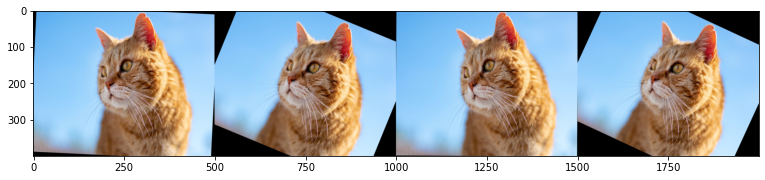

In [14]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

## iaa.Crop()
이번에는 텐서플로우 API로 사용했던 crop 기법을 적용해 보겠습니다. Crop 하려는 원본 이미지의 비율을 매개변수로 사용하여 이미지를 생성합니다.

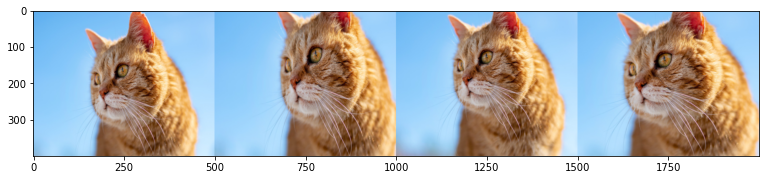

In [15]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

## iaa.Sequential()
이렇게 하나씩 기법을 적용하다 보면 "augmentation 기법들을 한 번에 조합하여 사용할 수는 없을까?" 라는 생각이 듭니다. imgaug에서는 iaa.Sequential를 사용해서 여러 가지의 augmentation 기법을 순차적으로 적용할 수 있습니다. 아래 코드에서는 위에서 사용한 rotate와 crop이 적용된 결과를 볼 수 있습니다.

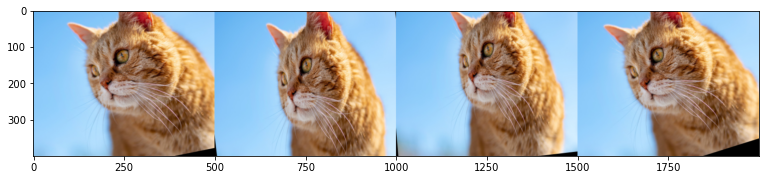

In [16]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

우리는 augmentation을 최대한 다양하게 적용하고 싶습니다. iaa.Sequential()의 augmentation 순서는 위 코드처럼 사용하면 고정이 됩니다. 하지만 random으로 기법들의 순서를 바꾸어 사용할 수 있도록 지원하고 있는데요. 아래 코드블록에서 random을 활용해서 순서를 바꿀 수 있도록 코드를 변경해봅시다.

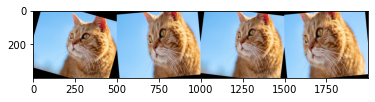

In [18]:
# modify iaa.sequential to use random step

images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)
plt.imshow(np.hstack(images_aug))

## iaa.Oneof()
여러 가지 augmentation 중 하나를 선택하도록 할 때는 어떻게 할 수 있을까요? iaa.OneOf()를 사용하면 여러 augmentation 기법들 중 하나를 선택하도록 할 수 있습니다. 예를 들어 색상에 변화를 줄 때 여러 변환이 불필요한 경우 선택지 중 하나의 기법만 적용되도록 할 수 있습니다. 아래에서는 gray scale로 변환하거나 saturation을 변화하는 augmentation 둘 중 하나가 적용되는 함수를 볼 수 있습니다.

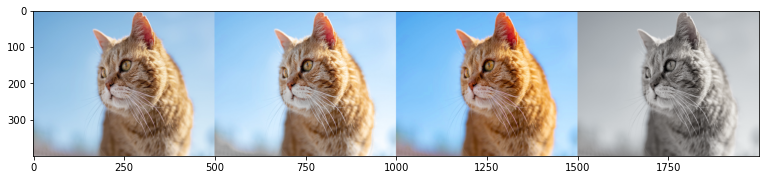

In [19]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

imgaug는 augmentation들이 일정 확률로 선택이 되게 하는 기능을 제공합니다. 이 기능을 사용하는 iaa.Sometimes()는 위의 iaa.OneOf()처럼 사용할 수 있는데요. 이를 활용해서 iaa.AddToSaturation()을 0.6의 확률로, iaa.Grayscale()를 0.2의 확률로 적용하는 augmentation 함수를 구현하고 결과를 시각화 해봅시다.

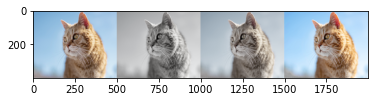

In [20]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale

images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.Sometimes(
         0.5,
         iaa.AddToSaturation((-50, 50))
     )
])
images_aug = seq(images=images)
plt.imshow(np.hstack(images_aug))

## iaa.Sequntial()과 iaa.OneOf(), iaa.Sometimes() 등 

각종 augmentation 기법을 활용하면 매우 다양한 조합을 만들어 낼 수 있습니다. 개와 고양이를 분류하는 모델을 만든다고 가정하고 직접 복잡한 augmentation을 만들어 봅시다. 이 때 조합될 수 있는 가짓수는 1024가지가 넘도록 해보세요! 시각화는 100장을 하도록 합시다.

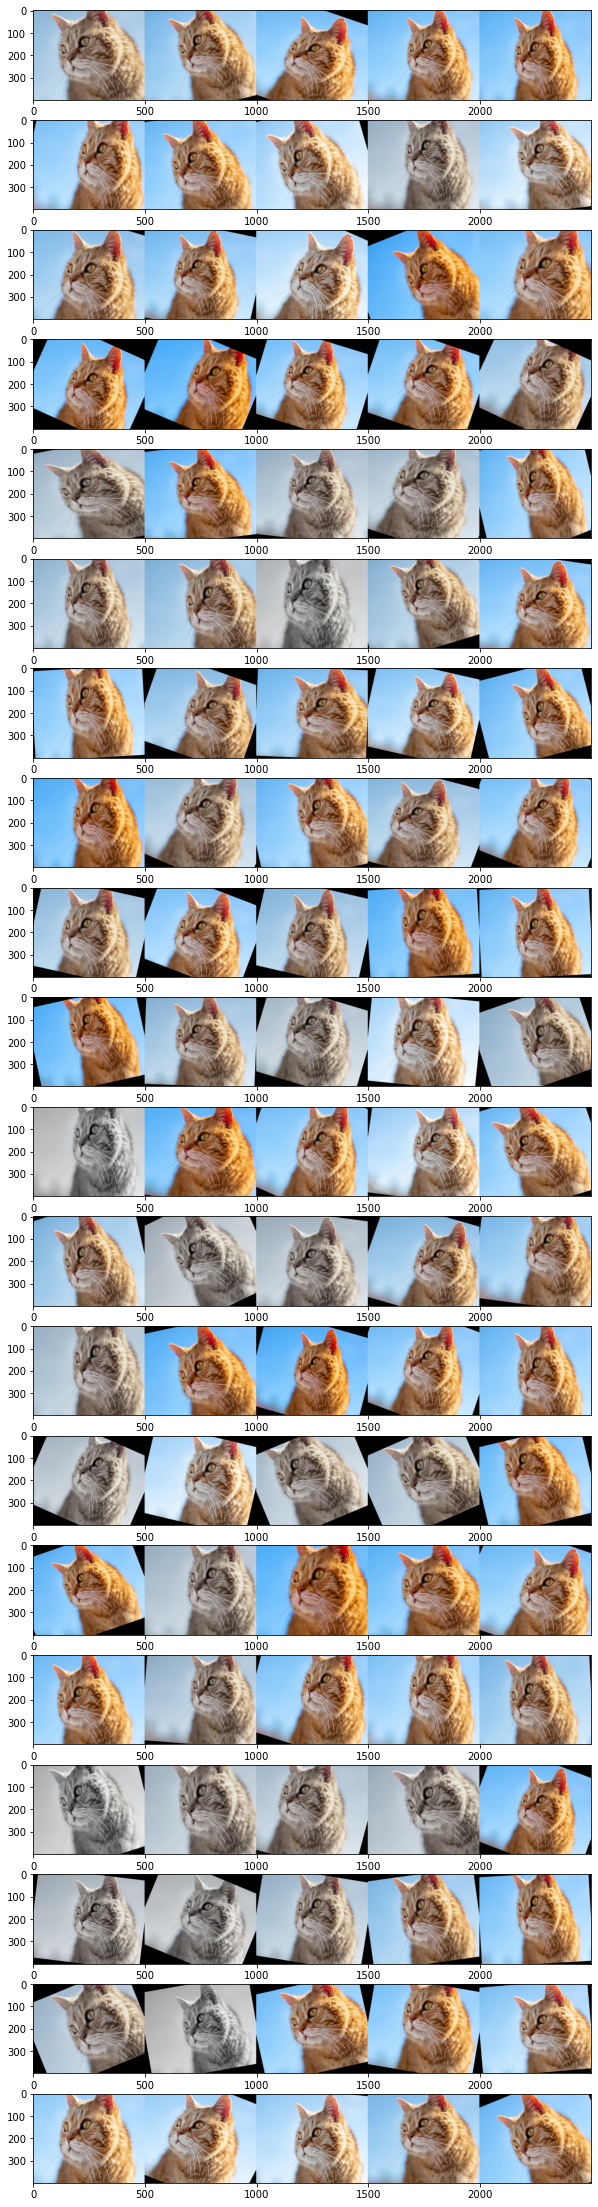

In [23]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.

seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()

# 더 나아간 기법들
지금까지 우리가 보아왔던 방식은 딥러닝이 아닌 일정한 수학적 알고리즘을 적용한 augmentation들입니다. 하지만 딥러닝이 발전함에 따라 data augmentation에도 딥러닝을 활용하는 방식이 개발되고 있습니다.

대표적으로 GAN을 Data augmentation에 활용할 수 있습니다. 아래 논문에서는 전통적인 augmentation 방법과 GAN을 활용한 augmentation을 적용하여 효과를 실험했습니다. 쉬운 예로는 전통적인 색상 변환 대신 스타일 트랜스퍼(style transfer) 모델을 적용해 볼 수 있겠습니다.